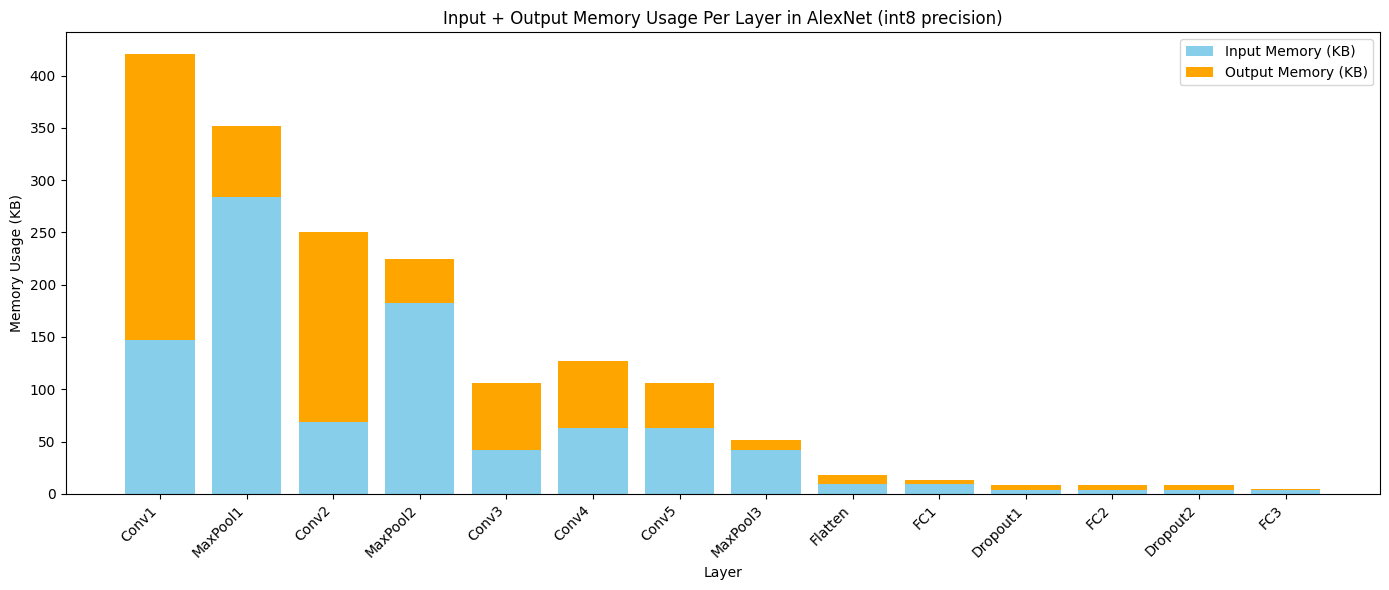

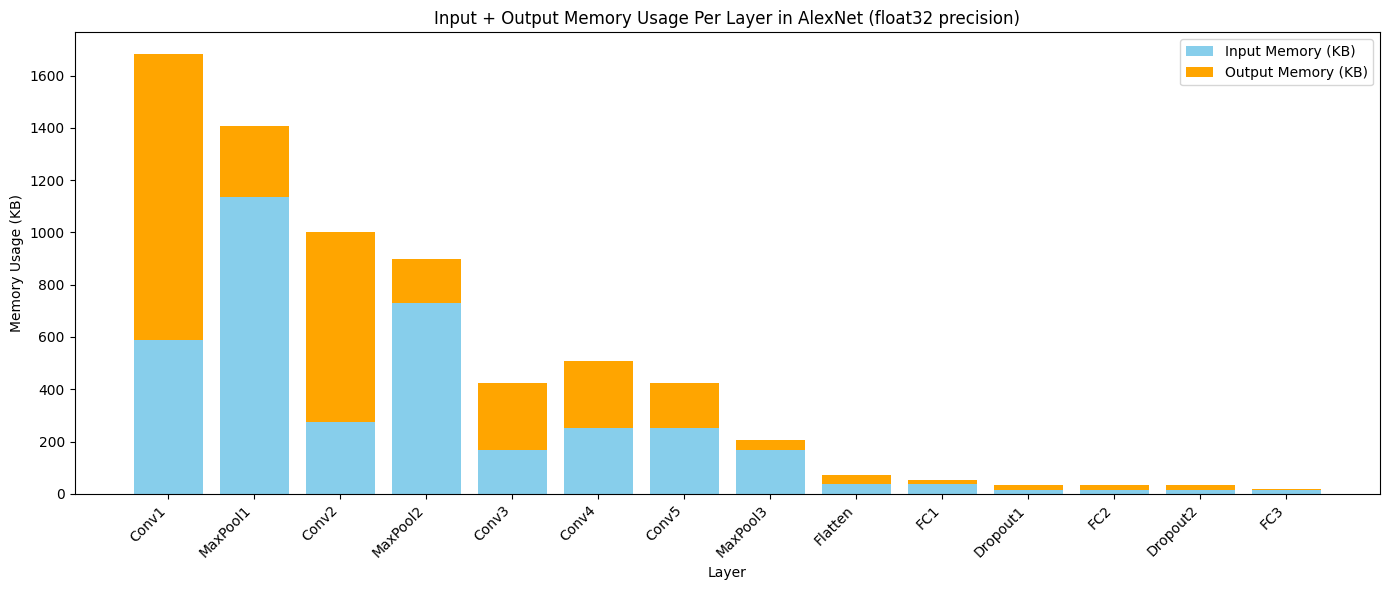

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the AlexNet architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] == 'Input':
        output_memory = input_memory
    elif layer['type'] in ['Conv', 'MaxPool']:
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        output_memory = np.prod(input_shape) * byte_size / 1024  # Flatten to 1D vector
    elif layer['type'] == 'FC':
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Dropout':
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire AlexNet model
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create stacked bar plot
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Load the architecture JSON file
    json_path = 'alexnet_architecture.json'
    alexnet_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(alexnet_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(alexnet_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer in AlexNet (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer in AlexNet (float32 precision)')

if __name__ == '__main__':
    main()


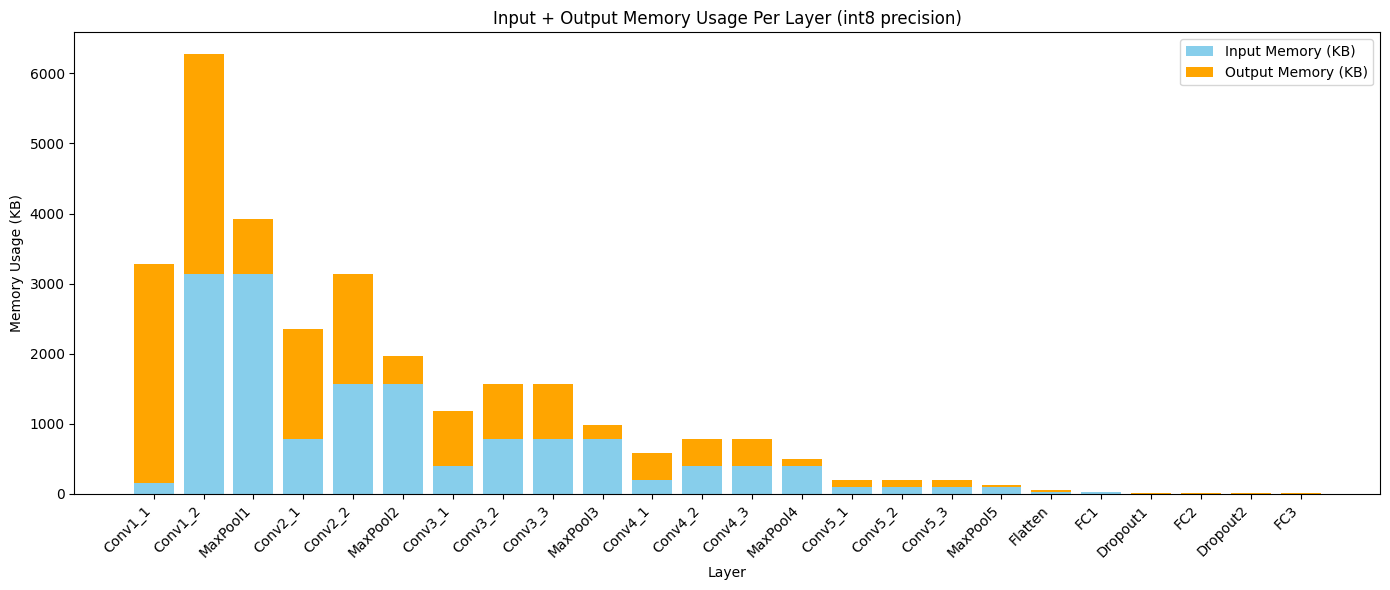

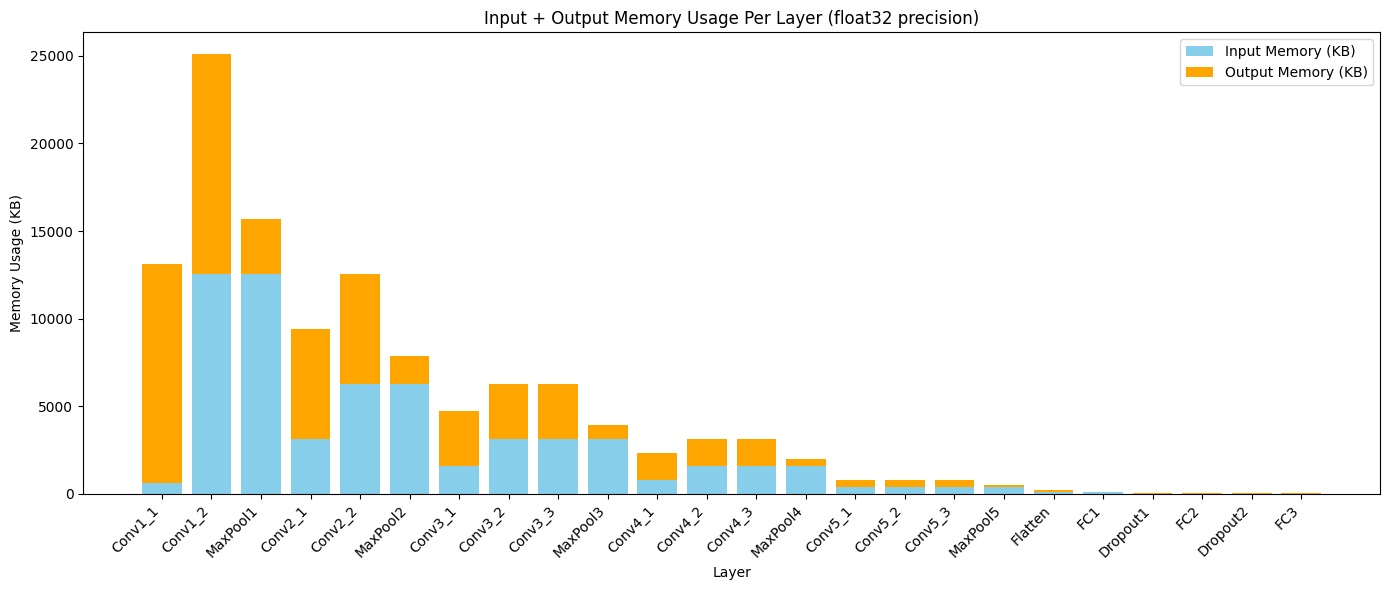

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] == 'Input':
        output_memory = input_memory
    elif layer['type'] in ['Conv', 'MaxPool']:
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        output_memory = np.prod(input_shape) * byte_size / 1024  # Flatten to 1D vector
    elif layer['type'] == 'FC':
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Dropout':
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'VGG16.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


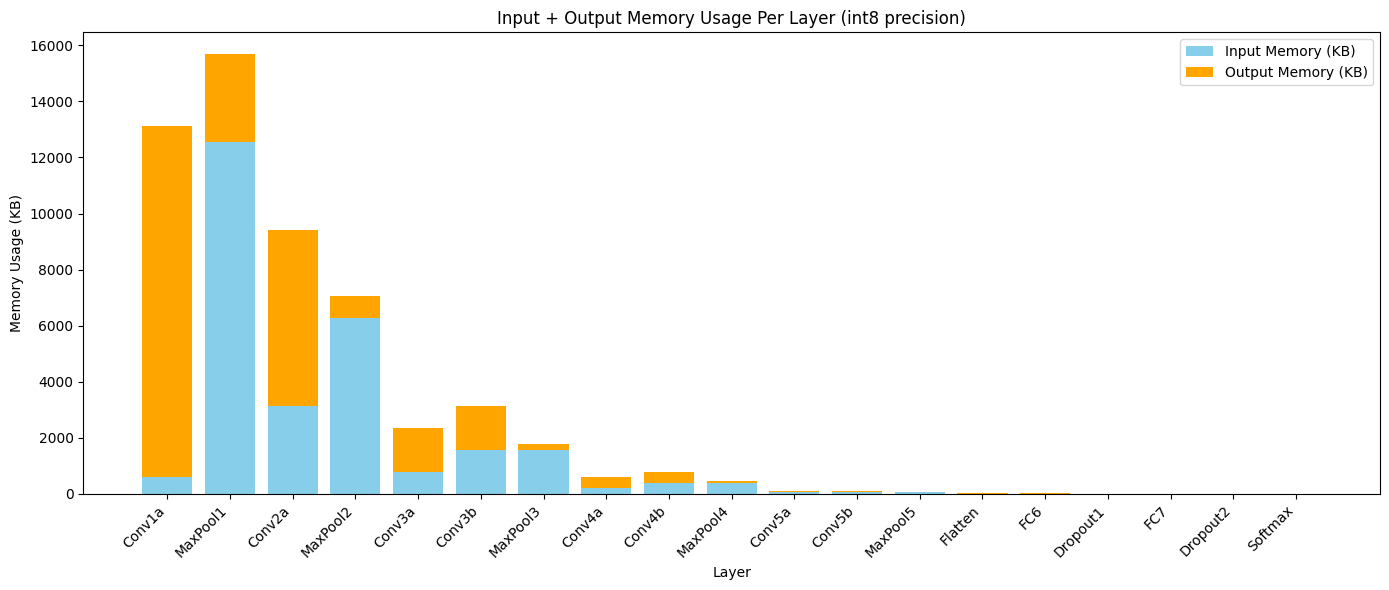

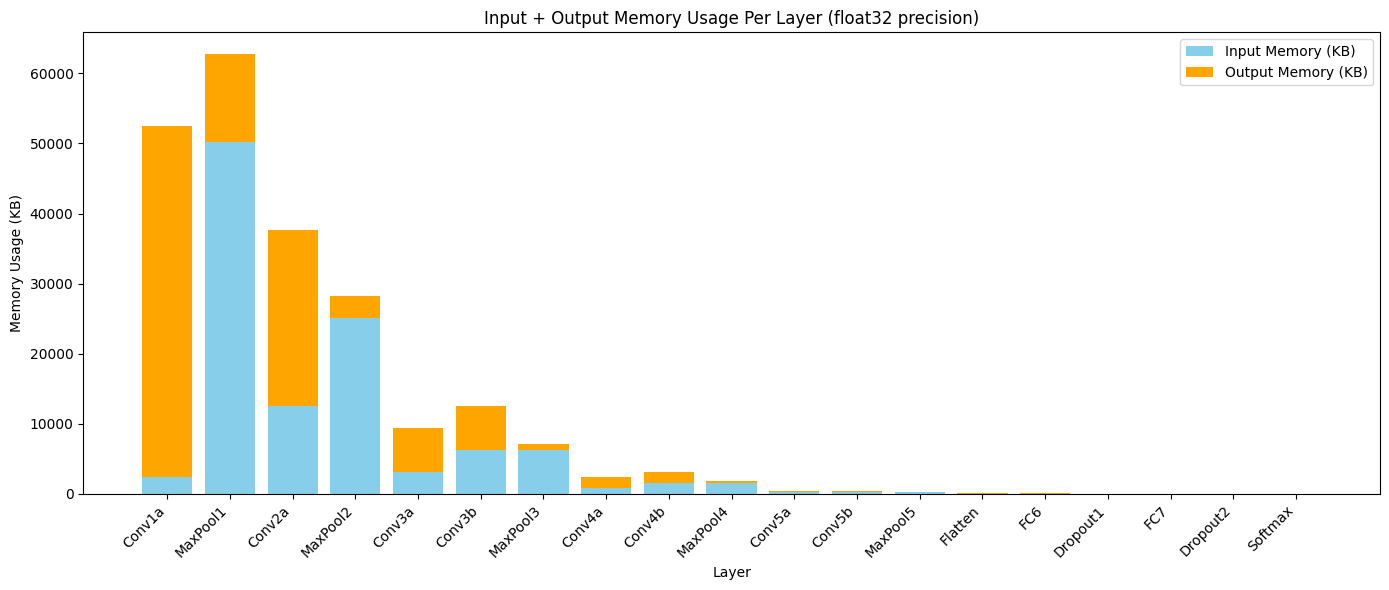

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including support for Conv3D
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'C3D.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


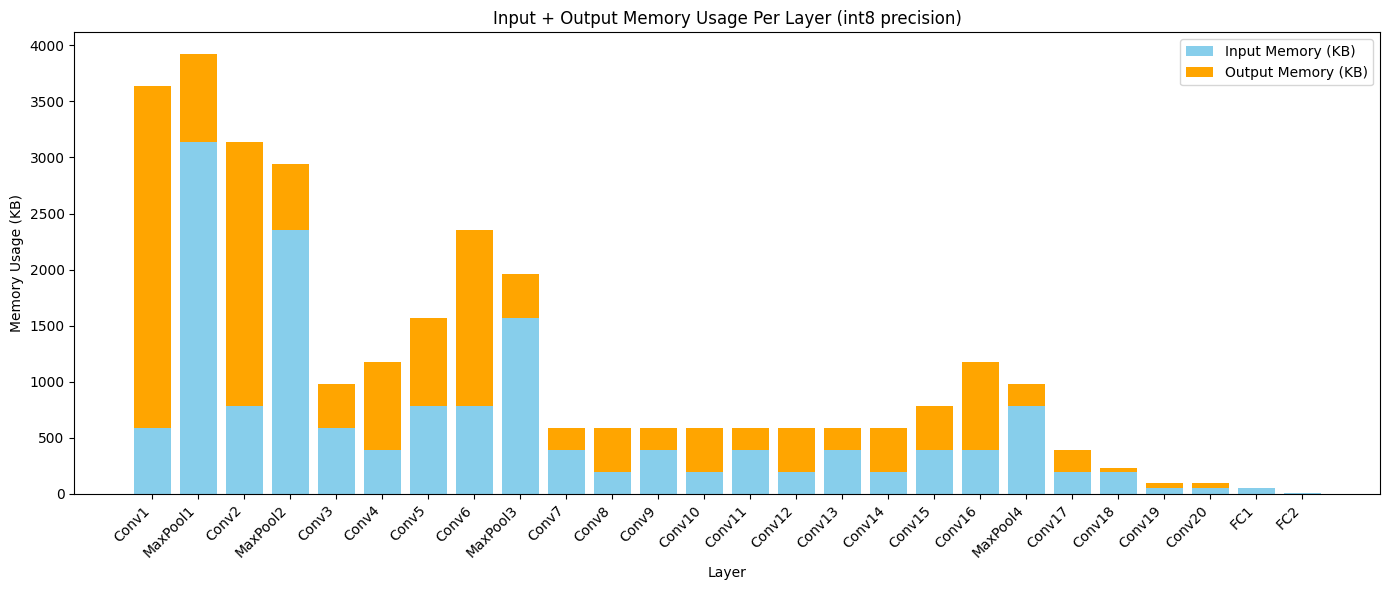

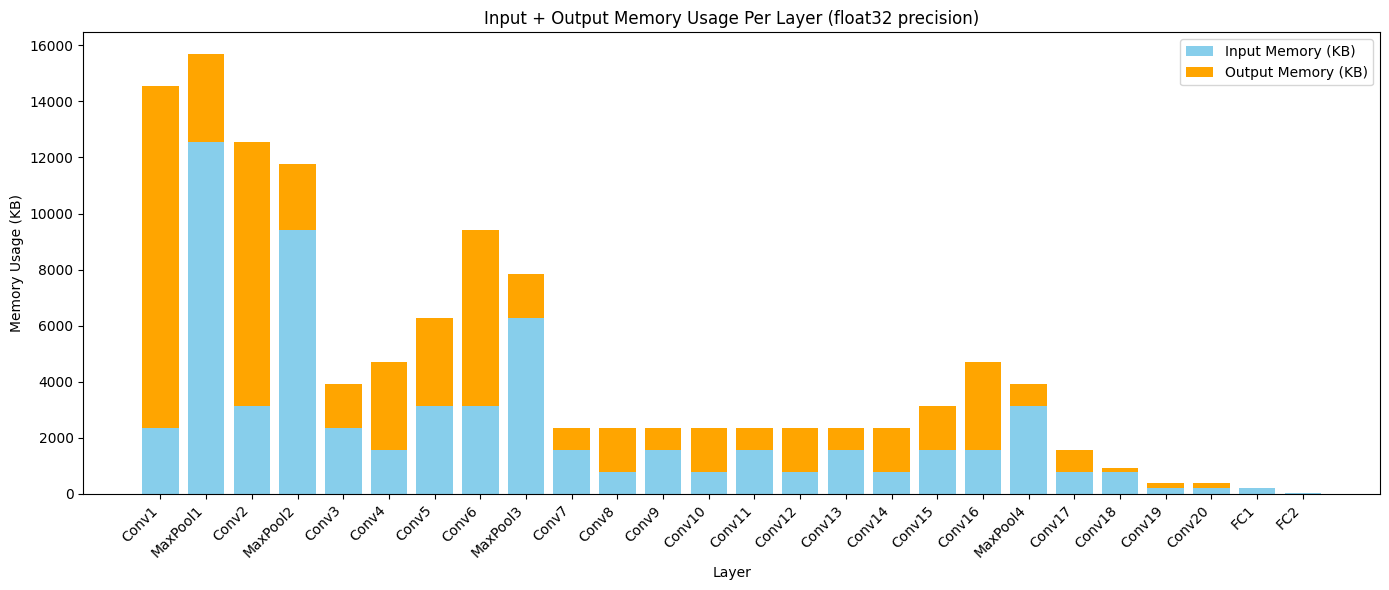

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including support for Conv3D
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'YOLO.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


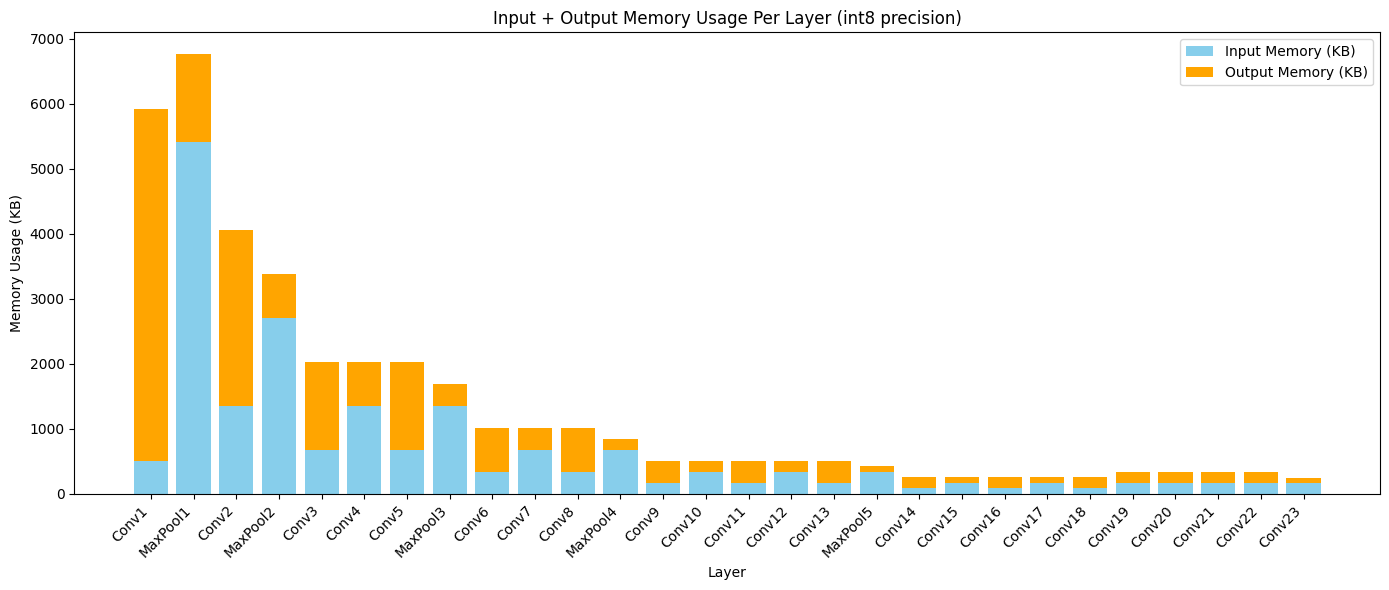

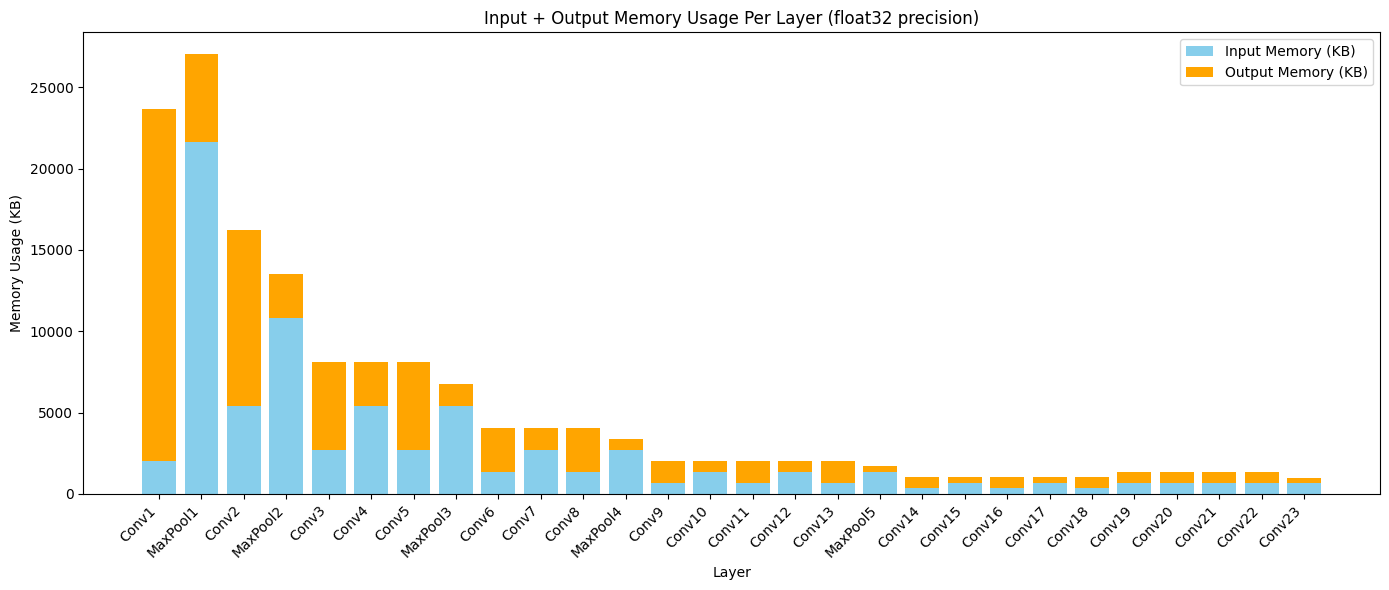

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including support for Conv3D
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'YOLOV2.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


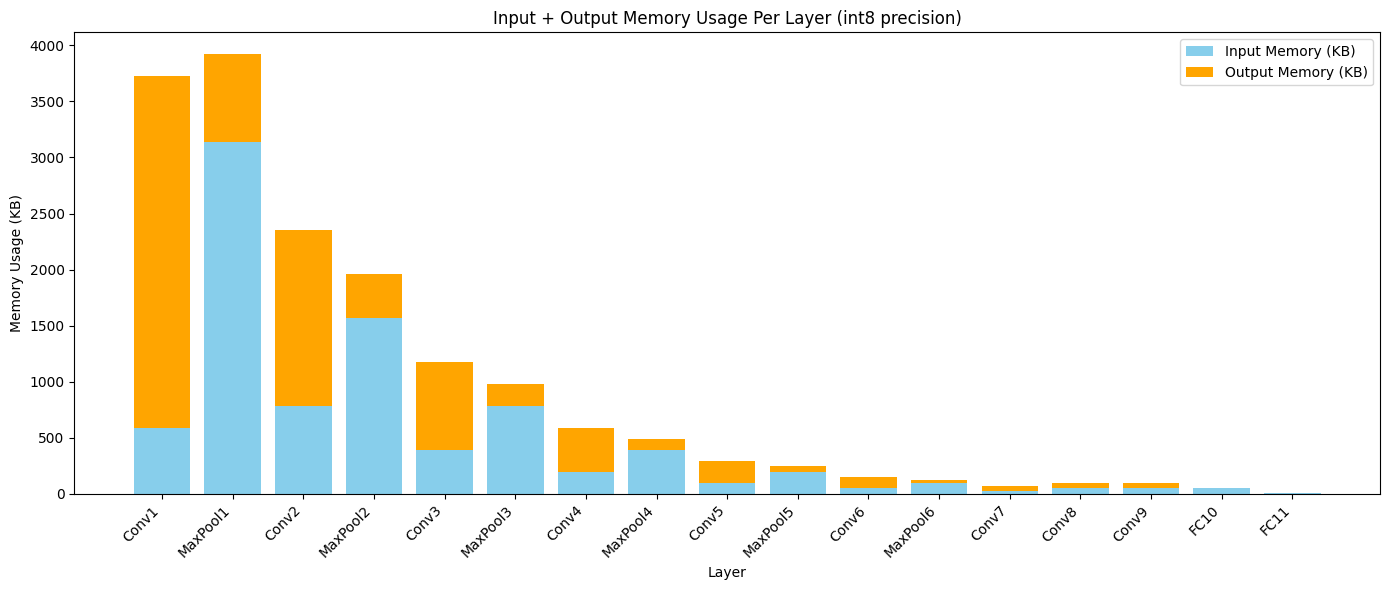

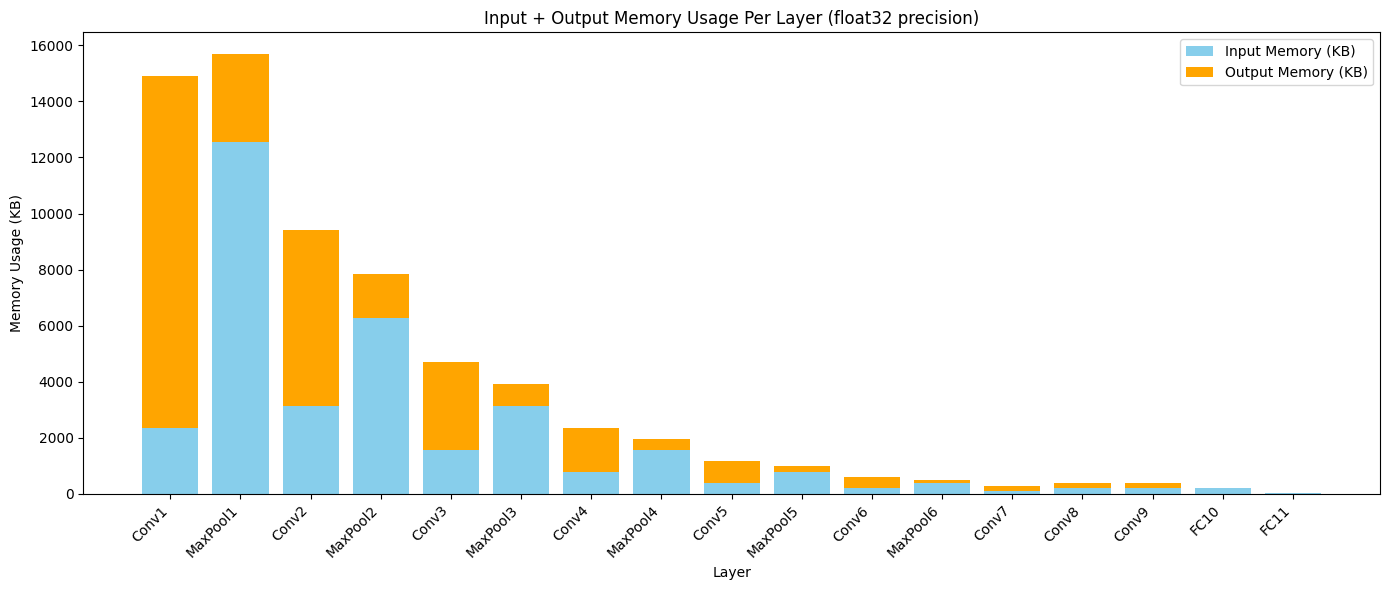

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including support for Conv3D
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'tinyYOLOV1.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


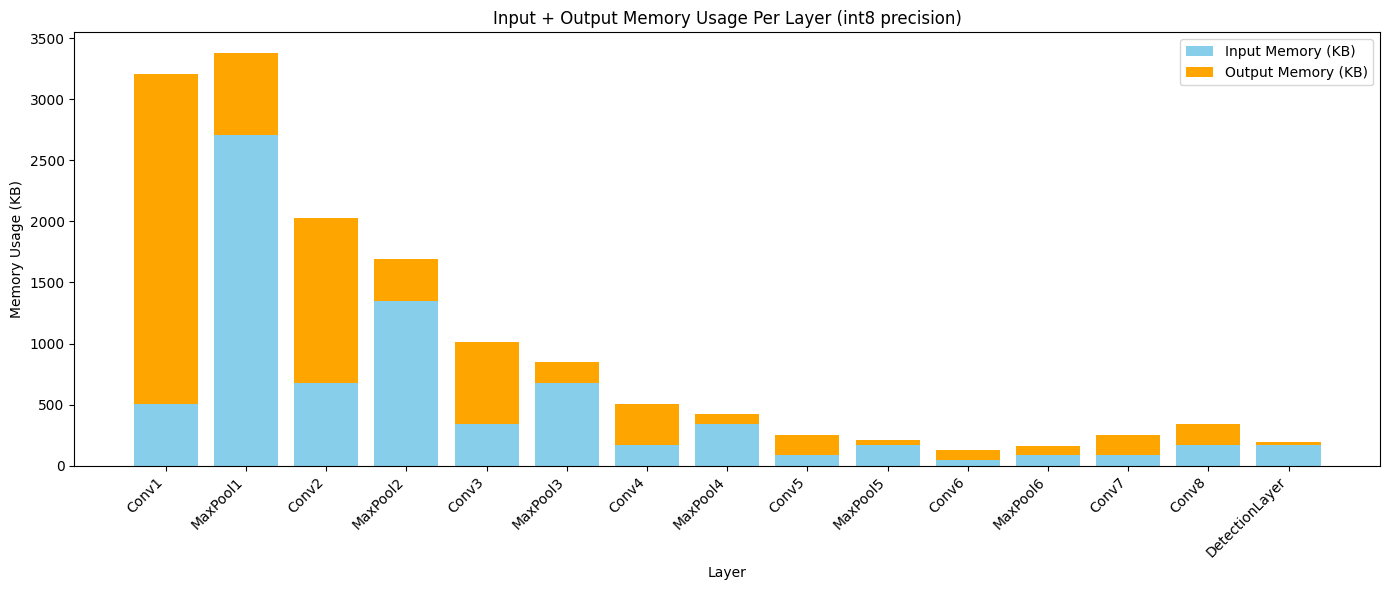

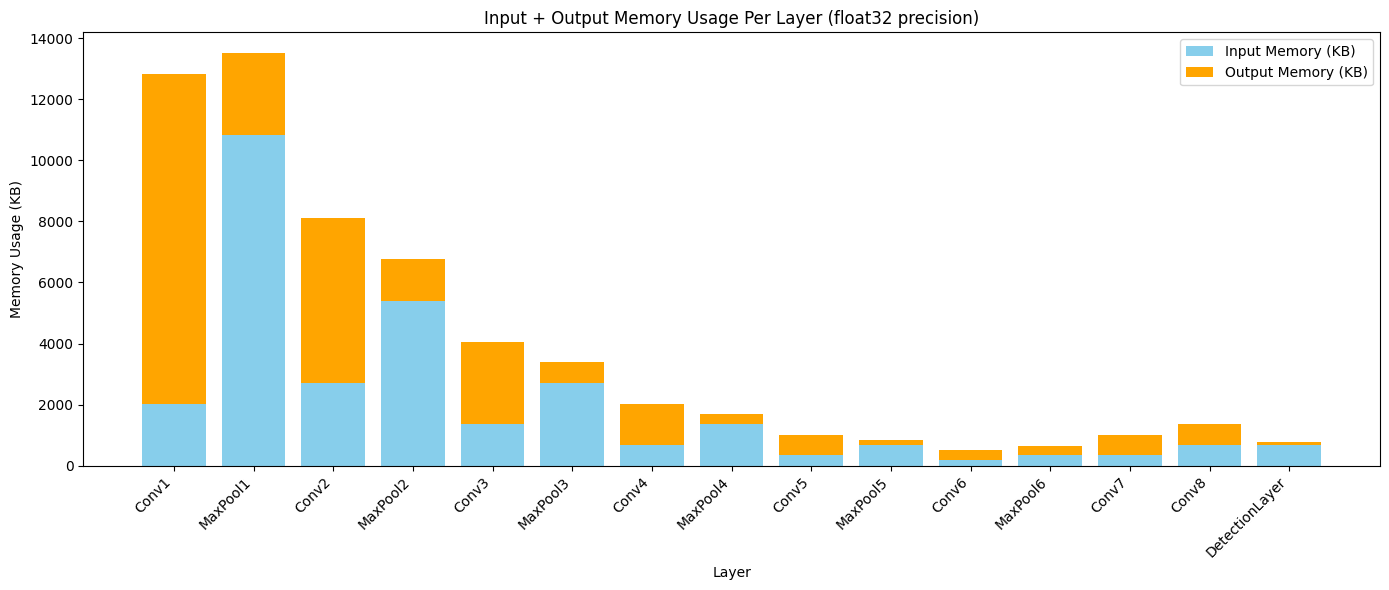

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including support for Conv3D
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'tinyYOLOV2.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model architecture from the JSON file
def load_model_architecture(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

# Function to compute input and output memory size for each layer dynamically, including Conv3D, Fire, and GlobalAvgPool
def calculate_layer_memory(layer, precision='int8'):
    data_type_size = {'int8': 1, 'float32': 4}
    byte_size = data_type_size[precision]

    # Compute input memory size
    input_shape = layer['input_shape']
    input_memory = np.prod(input_shape) * byte_size / 1024  # Convert to KB

    # Compute output memory size based on layer type
    if layer['type'] in ['Conv', 'MaxPool']:
        # 2D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'] + 1,
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'] + 1,
            layer['filters'] if layer['type'] == 'Conv' else input_shape[2]
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Fire':
        # Fire module: calculate for both squeeze and expand layers
        squeeze_filters = layer['squeeze_filters']
        expand_filters_1x1 = layer['expand_filters_1x1']
        expand_filters_3x3 = layer['expand_filters_3x3']
        
        # Squeeze layer output shape
        squeeze_output_shape = [input_shape[0], input_shape[1], squeeze_filters]
        squeeze_output_memory = np.prod(squeeze_output_shape) * byte_size / 1024
        
        # Expand layer output shapes
        expand_output_shape_1x1 = [input_shape[0], input_shape[1], expand_filters_1x1]
        expand_output_shape_3x3 = [
            (input_shape[0] - 3 + 2 * 1) // 1 + 1,  # Adjusted for 3x3 filters and stride 1, padding 1
            (input_shape[1] - 3 + 2 * 1) // 1 + 1,
            expand_filters_3x3
        ]
        expand_output_memory_1x1 = np.prod(expand_output_shape_1x1) * byte_size / 1024
        expand_output_memory_3x3 = np.prod(expand_output_shape_3x3) * byte_size / 1024

        # Total output memory is the sum of squeeze and both expand operations
        output_memory = squeeze_output_memory + expand_output_memory_1x1 + expand_output_memory_3x3
    elif layer['type'] in ['Conv3D', 'MaxPool3D']:
        # 3D Convolution or Pooling layers
        output_shape = [
            (input_shape[0] - layer['filter_size'][0] + 2 * layer['padding']) // layer['stride'][0] + 1,  # Temporal dimension
            (input_shape[1] - layer['filter_size'][1] + 2 * layer['padding']) // layer['stride'][1] + 1,  # Height dimension
            (input_shape[2] - layer['filter_size'][2] + 2 * layer['padding']) // layer['stride'][2] + 1,  # Width dimension
            layer['filters'] if layer['type'] == 'Conv3D' else input_shape[3]  # Number of filters (channels)
        ]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    elif layer['type'] == 'Flatten':
        # Flatten to 1D vector
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'FC':
        # Fully Connected layer
        output_memory = layer['units'] * byte_size / 1024  # Convert to KB
    elif layer['type'] in ['Dropout', 'Softmax']:
        # Dropout and Softmax retain the same input shape
        output_memory = np.prod(input_shape) * byte_size / 1024
    elif layer['type'] == 'GlobalAvgPool':
        # Global Average Pooling: output is [1, 1, channels]
        output_shape = [1, 1, input_shape[2]]
        output_memory = np.prod(output_shape) * byte_size / 1024  # Convert to KB
    else:
        raise ValueError(f"Unsupported layer type: {layer['type']}")

    return input_memory, output_memory

# Compute memory usage for the entire model based on the dynamically loaded architecture
def calculate_model_memory(layers, precision='int8'):
    memory_usage = {}
    for layer in layers:
        input_mem, output_mem = calculate_layer_memory(layer, precision)
        memory_usage[layer['name']] = {"input_memory": input_mem, "output_memory": output_mem}
    return memory_usage

# Plot the input and output memory usage for the layers
def plot_memory_usage(memory_usage, title):
    layer_names = list(memory_usage.keys())
    input_memory = [memory_usage[layer]['input_memory'] for layer in layer_names]
    output_memory = [memory_usage[layer]['output_memory'] for layer in layer_names]

    # Create a stacked bar plot to show the memory usage
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(layer_names)), input_memory, label='Input Memory (KB)', color='skyblue')
    plt.bar(range(len(layer_names)), output_memory, bottom=input_memory, label='Output Memory (KB)', color='orange')
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')
    plt.xlabel('Layer')
    plt.ylabel('Memory Usage (KB)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load model architecture and calculate memory for any model
def main():
    # Load the architecture JSON file dynamically for any model
    json_path = 'squeezeNet.json'  # Change this path for different model architectures
    model_layers = load_model_architecture(json_path)

    # Calculate memory usage for each layer
    int8_memory_usage = calculate_model_memory(model_layers, precision='int8')
    float32_memory_usage = calculate_model_memory(model_layers, precision='float32')

    # Plot memory usage for int8 and float32 precisions
    plot_memory_usage(int8_memory_usage, 'Input + Output Memory Usage Per Layer (int8 precision)')
    plot_memory_usage(float32_memory_usage, 'Input + Output Memory Usage Per Layer (float32 precision)')

if __name__ == '__main__':
    main()


ValueError: Unsupported layer type: GlobalAvgPool